In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('mushrooms.csv')

# 1. Basic Dataset Overview
print("=== Dataset Overview ===")
print(f"Number of instances: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nFirst 5 rows:")
print(df.head())

# 2. Target Variable Analysis
print("\n=== Class Distribution ===")
class_dist = df['class'].value_counts(normalize=True) * 100
print(class_dist)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='class')
plt.title('Class Distribution (e: edible, p: poisonous)')
plt.show()

# 3. Feature Analysis
print("\n=== Feature Analysis ===")

# Check data types and missing values
print("\nData types and missing values:")
print(df.info())

# Check for any missing values (represented as '?')
for col in df.columns:
    if '?' in df[col].unique():
        print(f"\nColumn '{col}' has missing values represented as '?'")
        print(df[col].value_counts())

# 4. Categorical Feature Distributions
def plot_categorical_features(col, max_categories=12):
    plt.figure(figsize=(10,5))
    if df[col].nunique() > max_categories:
        # For high cardinality features, show top categories
        top_categories = df[col].value_counts().index[:max_categories]
        filtered_df = df[df[col].isin(top_categories)]
        sns.countplot(data=filtered_df, x=col, hue='class')
    else:
        sns.countplot(data=df, x=col, hue='class')
    plt.title(f'Distribution of {col} by class')
    plt.xticks(rotation=45)
    plt.show()

# Analyze important features
important_features = ['odor', 'gill-color', 'spore-print-color', 'bruises', 'gill-size', 'population']
for feature in important_features:
    print(f"\nValue counts for {feature}:")
    print(df[feature].value_counts())
    plot_categorical_features(feature)

# 5. Cross-tabulation of important features with class
for feature in important_features[:3]:  # Just show first 3 for brevity
    print(f"\nCross-tabulation of {feature} with class:")
    print(pd.crosstab(df['class'], df[feature], margins=True))
    
# 6. Feature Cardinality Analysis
print("\n=== Feature Cardinality ===")
cardinality = {}
for col in df.columns:
    cardinality[col] = df[col].nunique()
    
cardinality_df = pd.DataFrame.from_dict(cardinality, orient='index', columns=['unique_values'])
print(cardinality_df.sort_values('unique_values', ascending=False))

# 7. Correlation between features (using Cramer's V)
# Note: This requires additional helper functions for categorical-categorical correlation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df1=pd.read_csv('mushrooms.csv')
df1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [17]:
df1.shape

(8124, 23)

In [9]:
df1.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
df1.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Target Variable Analysis:

Class Distribution
class
e    51.797144
p    48.202856
Name: proportion, dtype: float64


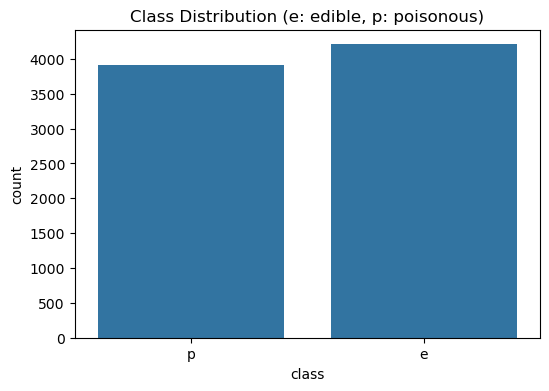

In [20]:
print("Class Distribution")
class_dist=df1['class'].value_counts(normalize=True)*100
print(class_dist)
plt.figure(figsize=(6,4))
sns.countplot(data=df1,x='class')
plt.title("Class Distribution (e: edible, p: poisonous)")
plt.show()

### 3.Feature Analysis:

In [31]:
print("Feature Analysis")
print("Data types and missing values")
print(df1.info())
for col in df1.columns:
    if '?' in df1[col].unique():
        print(f"\nColumn '{col}' has missing values represented as '?'")
        print(df1[col].value_counts())

Feature Analysis
Data types and missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 


Value counts for odor:
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64


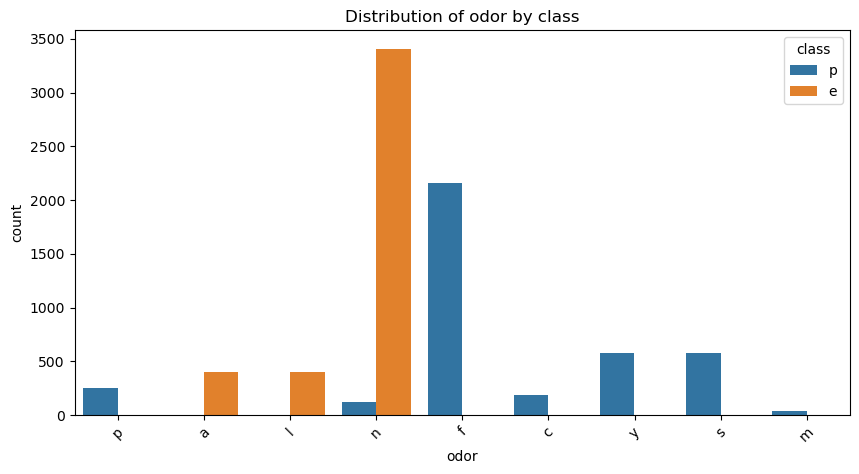


Value counts for gill-color:
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64


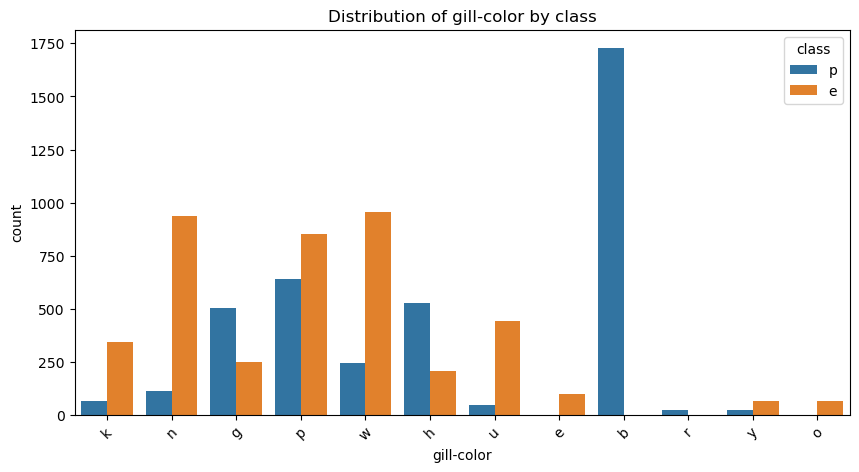


Value counts for spore-print-color:
spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64


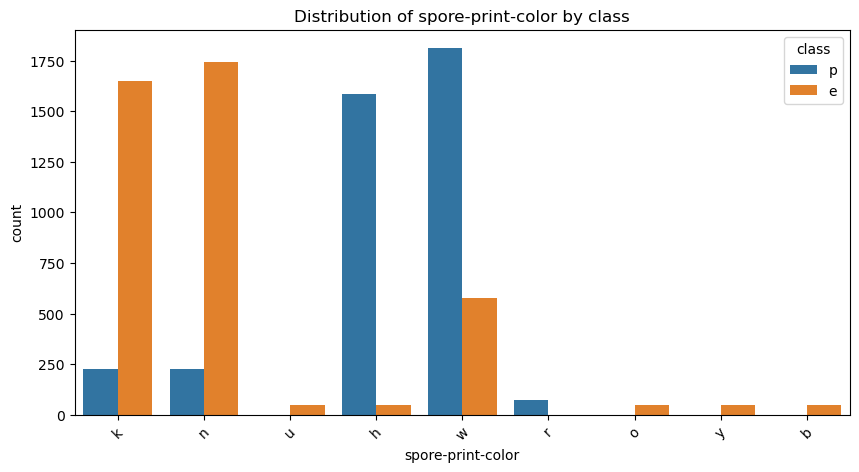


Value counts for bruises:
bruises
f    4748
t    3376
Name: count, dtype: int64


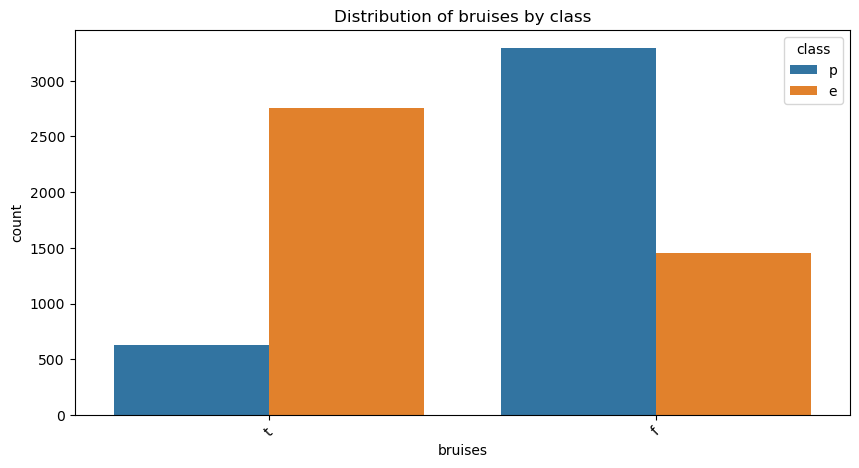


Value counts for gill-size:
gill-size
b    5612
n    2512
Name: count, dtype: int64


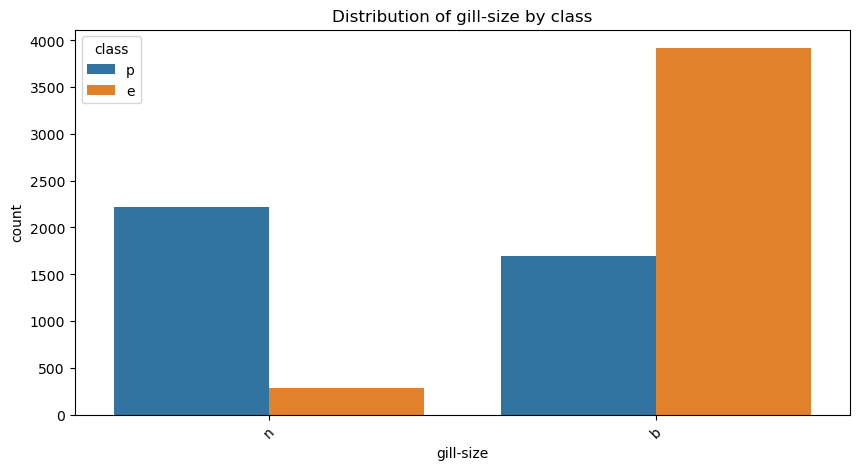


Value counts for population:
population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64


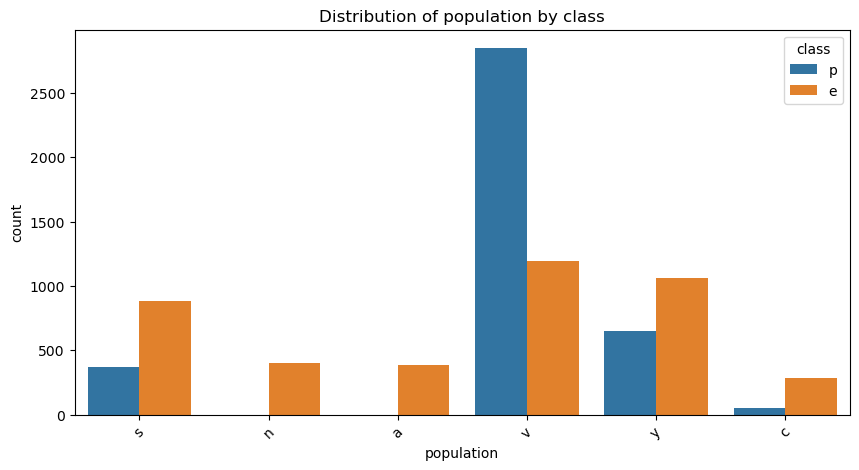

In [47]:
# 4. Categorical Feature Distributions
def plot_categorical_features(col, max_categories=12):
    plt.figure(figsize=(10,5))
    if df1[col].nunique() > max_categories:
        # For high cardinality features, show top categories
        top_categories = df1[col].value_counts().index[:max_categories]
        filtered_df = df1[df1[col].isin(top_categories)]
        sns.countplot(data=filtered_df, x=col, hue='class')
    else:
        sns.countplot(data=df1, x=col, hue='class')
    plt.title(f'Distribution of {col} by class')
    plt.xticks(rotation=45)
    plt.show()

# Analyze important features

important_features = ['odor', 'gill-color', 'spore-print-color', 'bruises', 'gill-size', 'population']
for feature in important_features:
    print(f"\nValue counts for {feature}:")
    print(df1[feature].value_counts())
    plot_categorical_features(feature)